# DIABETES PREDICTION MODEL USING MACHINE LEARNING

In [100]:
import numpy as np  #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  #to plot charts
import seaborn as sns #used for data visualization
import sklearn  # import scikit-learn for machine learning tasks
%matplotlib inline 

In [101]:
#diabetes prediction dataset --- from kaggle.com
# link: https://www.kaggle.com/datasets/johndasilva/diabetes?resource=download
df = pd.read_csv('diabetes.csv')  #Read the diabetes dataset from a CSV file
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


# Exploratory Data Analysis and Visualisation

In [102]:
df.head() #Displays the top 5 data records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [103]:
df.describe() #Generate descriptive statistics summary of the DataFrame

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [104]:
df.isnull().any() # Check if any columns have missing values (NaN)

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [105]:
df.columns # Retrieve the column names of the DataFrame

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [106]:
df.shape #Dimensions of the DataFrame (2000 rows and 9 columns)

(2000, 9)

In [107]:
df.info()  # Get a concise summary of the DataFrame's information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [108]:
df = df.rename(columns={"DiabetesPedigreeFunction":"DPF"}) #DPF --> Diabetes Predigree function
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


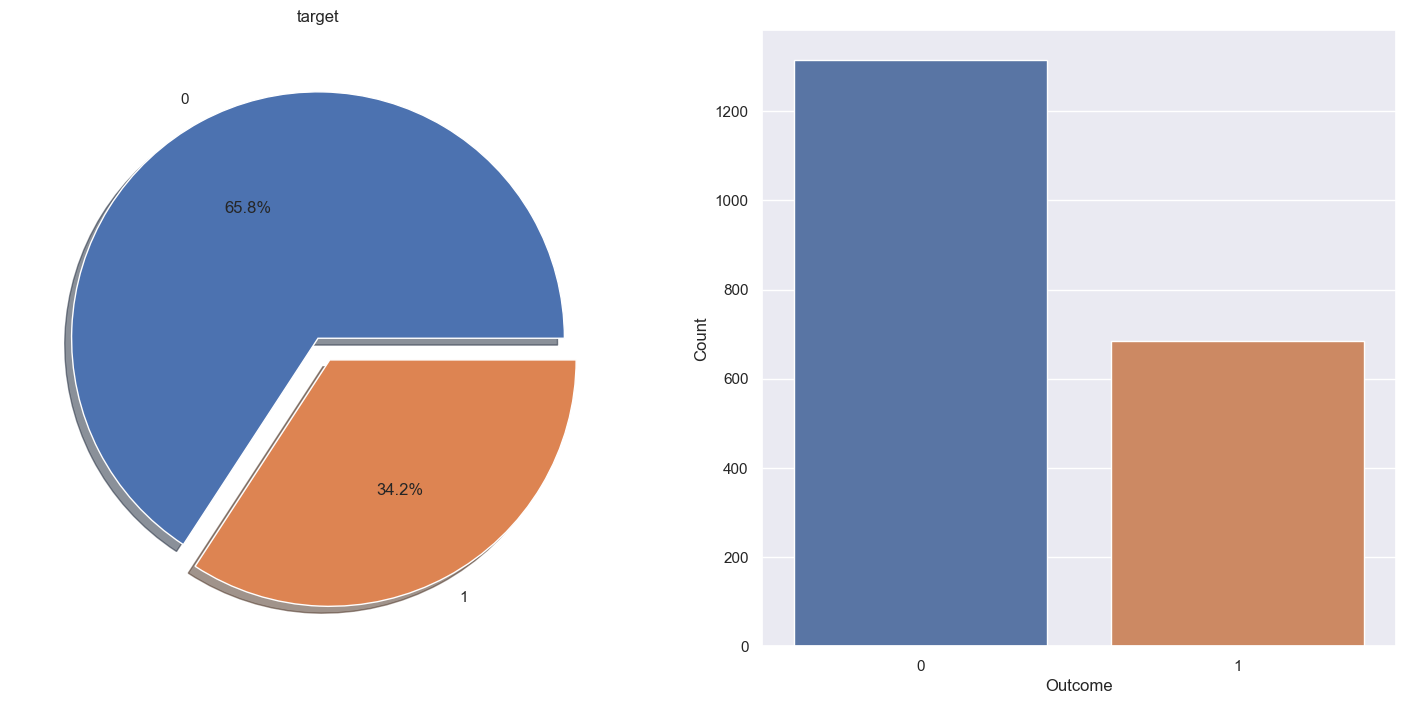

In [109]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))  # Create subplots with a figure size of 18x8
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)  # Plot a pie chart for the 'Outcome' column
ax[0].set_title('target')  # Set the title for the pie chart
ax[0].set_ylabel('')  # Set the y-label for the pie chart
sns.countplot(x='Outcome', data=df, ax=ax[1])  # Plot a count plot for the 'Outcome' column
plt.xlabel('Outcome')  # Set the x-label for the count plot
plt.ylabel('Count')  # Set the y-label for the count plot
plt.show()  # Display the plots


The above pie chart shows the percentage of people who has diabetes and those who don't have. 65.8% of people are non diabetic and 34.2% are diabetic. 
The count plot also shows the total number of diabetic and non diabetic people.

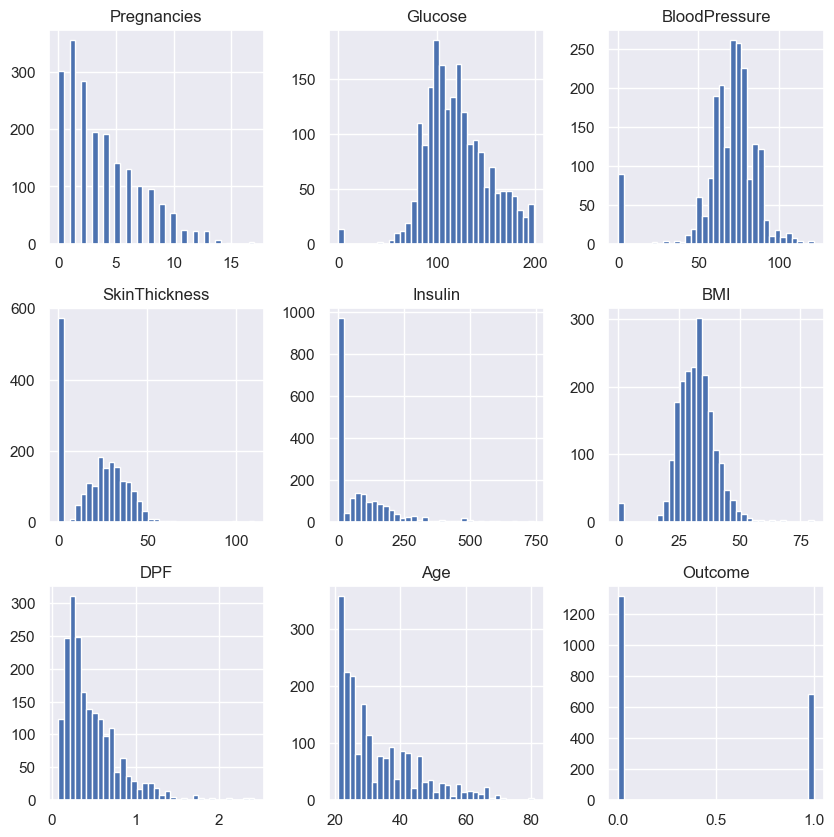

In [110]:
df.hist(bins=35, figsize=(10, 10))  # Create histograms for each column in the DataFrame
plt.show()  # Display the histograms

the histogram shows the distribution of the data in the dataset. The distribution of data in each attribute is shown in the above plot.
From the graph of pregnancies,age, and DPF, we understand that the its distribution is right skewed.


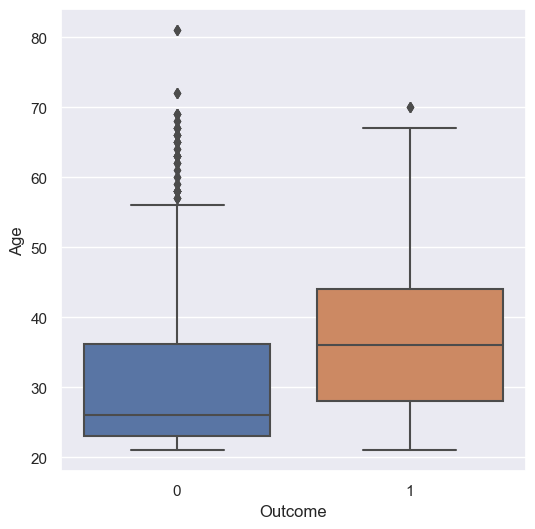

In [111]:
plt.figure(figsize=(6, 6))  # Set the figure size to 6x6
sns.boxplot(data=df, x="Outcome", y="Age")  # Create a boxplot showing the distribution of "Age" across different "Outcome" categories
plt.show()  # Display the boxplot

from the boxplot, the range of age of people who are diabetic and non diabetic is depicted. it is seen that more outliers are present in the non diabetic class but only one is there in the diabetic class.
The minimum for non diabetic class is 20 and the maximum is 80, whereas the minimum age for non diabetic class is 29 and maximum goes upto 70.

Pregnancies    Axes(0.125,0.11;0.775x0.77)
dtype: object

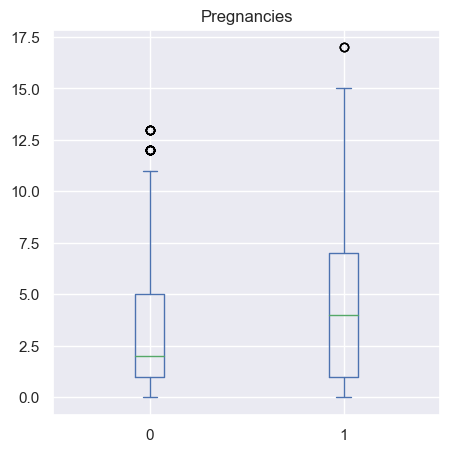

In [112]:
df.plot.box(column="Pregnancies", by="Outcome", figsize=(5,5))

the above boxplot shows the range of no of pregnancies of both the diabetic and non diabetic classes.

<Axes: >

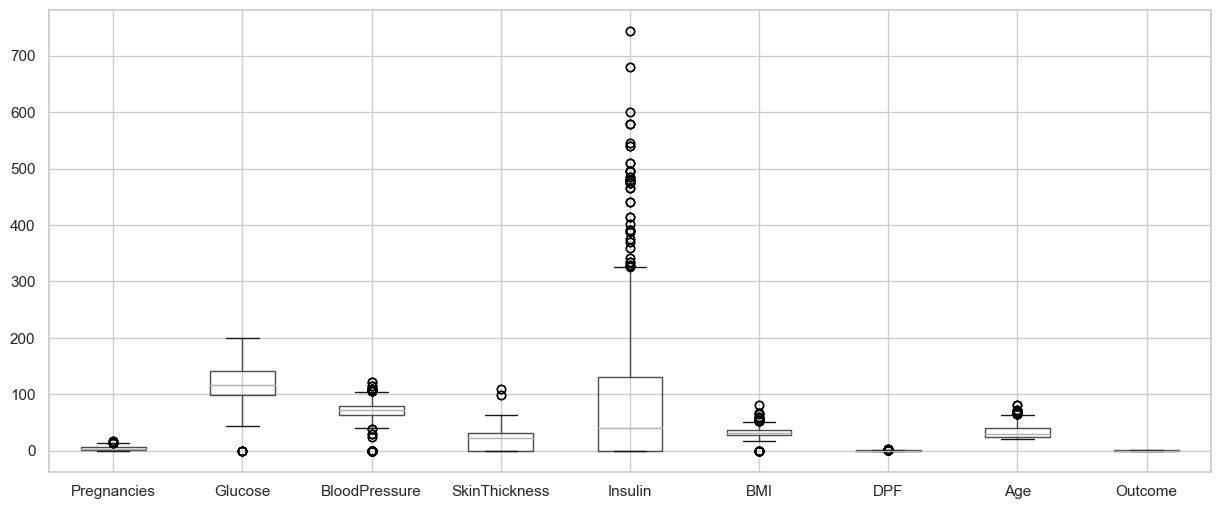

In [113]:
#Outlier visualization using box plot
sns.set(style="whitegrid")  # Set the Seaborn style to "whitegrid"
df.boxplot(figsize=(15, 6))  # Create a boxplot for all columns in the DataFrame with a figure size of 15x6

the above is the boxplot for all the features. these boxplot helps us in detecting the outliers.

<Axes: >

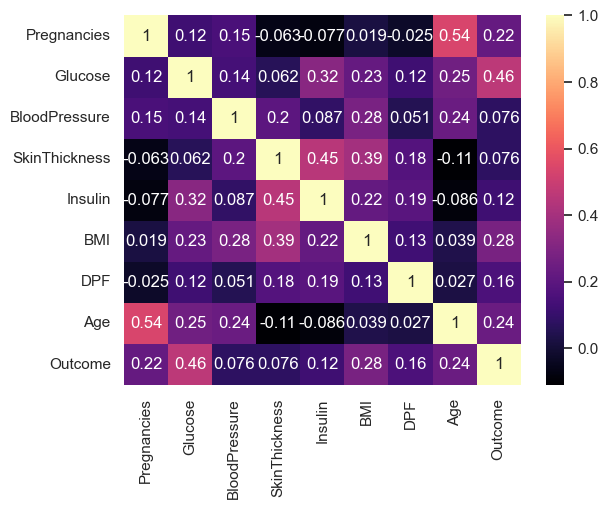

In [114]:
sns.heatmap(df.corr(), cmap="magma", annot=True)  # Create a correlation heatmap for the DataFrame

The above heatmap shows the correlation between all the features. According to the scale given, lighter the color, more correlation the two features.

<Axes: >

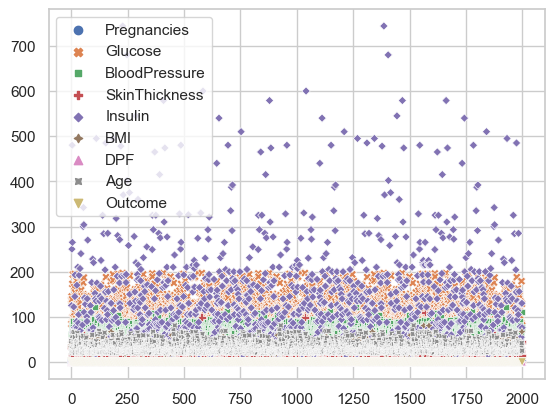

In [115]:
sns.scatterplot(df)

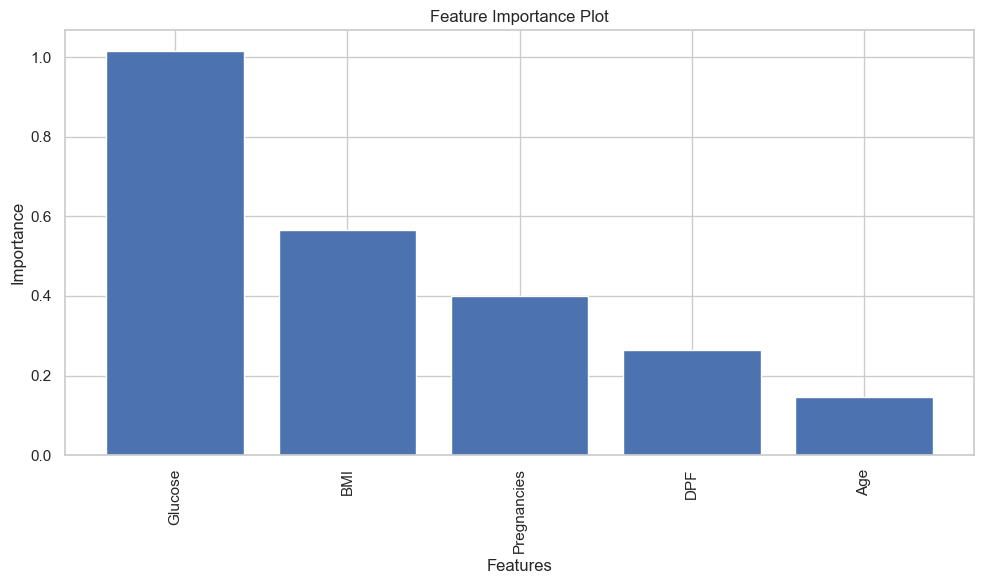

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Separate the features (X) and the target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Preprocess the data - feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_scaled, y)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_selected, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]

# Get the feature importances
feature_importances = model.coef_[0]

# Sort the feature importances and selected features in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = selected_features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create the feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.tight_layout()
plt.show()

The above plot shows that Glucose is the most important feature and the age is the least important one. Glucose is then followed by BMI, Pregnancies, DPF and age.

# SPLITTING THE DATASET INTO TRAINING AND TEST DATA

In [117]:
from sklearn.model_selection import train_test_split 

X = df.iloc[:, 0:8]  # Assigning the first 8 columns of the DataFrame to X as the features
Y = df.iloc[:, 8]  # Assigning the last column of the DataFrame to Y as the target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)  # Splitting the data into training and testing sets
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
582,12,121,78,17,0,26.5,0.259,62
159,17,163,72,41,114,40.9,0.817,47
1827,1,102,74,0,0,39.5,0.293,42
318,3,115,66,39,140,38.1,0.150,28
708,9,164,78,0,0,32.8,0.148,45
...,...,...,...,...,...,...,...,...
835,5,99,54,28,83,34.0,0.499,30
1216,6,190,92,0,0,35.5,0.278,66
1653,4,95,64,0,0,32.0,0.161,31
559,11,85,74,0,0,30.1,0.300,35


In [118]:
Y_train

582     0
159     1
1827    1
318     0
708     1
       ..
835     0
1216    1
1653    1
559     0
684     0
Name: Outcome, Length: 1600, dtype: int64

In [119]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
405,2,123,48,32,165,42.1,0.520,26
1190,2,106,56,27,165,29.0,0.426,22
1132,6,195,70,0,0,30.9,0.328,31
731,8,120,86,0,0,28.4,0.259,22
1754,4,145,82,18,0,32.5,0.235,70
...,...,...,...,...,...,...,...,...
638,7,97,76,32,91,40.9,0.871,32
360,5,189,64,33,325,31.2,0.583,29
1810,1,149,68,29,127,29.3,0.349,42
1743,2,155,52,27,540,38.7,0.240,25


In [120]:
Y_test

405     0
1190    0
1132    1
731     1
1754    1
       ..
638     1
360     1
1810    1
1743    1
563     0
Name: Outcome, Length: 400, dtype: int64

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Creating an instance of the StandardScaler class
X_train = scaler.fit_transform(X_train)  # Scaling the training set features using the fit_transform()
X_test = scaler.transform(X_test)  # Scaling the testing set features


# KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,p=2,metric='euclidean')
model_knn.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [123]:
Y_pred = model_knn.predict(X_test) #Making predictions on the testing set
Y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [124]:
from sklearn.metrics import confusion_matrix
ConfMatrix = confusion_matrix(Y_test,Y_pred) # Calculating the confusion matrix
print(ConfMatrix)

[[247  25]
 [ 62  66]]


<Axes: >

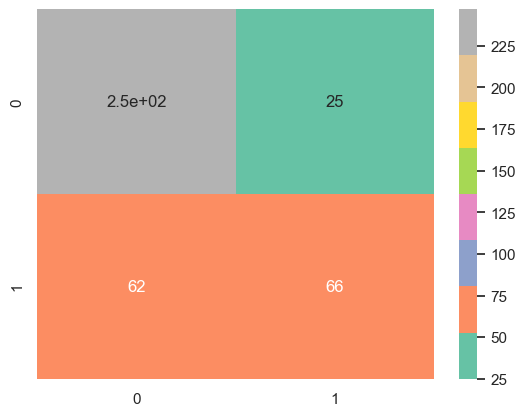

In [125]:
sns.heatmap(ConfMatrix, cmap="Set2",annot = True)  # Creating a heatmap of the confusion matrix 

The above plot is the heatmap of the confusion matrix of ytest and ypred. the four blocks represent the True positives,
true negatives, false positives and false negatives.

In [126]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))  # Calculating the classification report

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       272
           1       0.73      0.52      0.60       128

    accuracy                           0.78       400
   macro avg       0.76      0.71      0.73       400
weighted avg       0.78      0.78      0.77       400



In [127]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))  # Calculating the accuracy score 

0.7825


The KNN model gives 78% accuracy. The precision, recall, and the f1-scores are also printed in the classification report

# Cross Validation

In [128]:
from sklearn.model_selection import cross_val_score
cv_knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean') # Creating a K-nearest neighbors classifier object
cv_knn_scores = cross_val_score(cv_knn, X, Y, cv = 10, scoring = 'accuracy') # Performing cross-validation using cross_val_score()
cv_knn_scores

array([0.775, 0.705, 0.88 , 0.8  , 0.885, 0.8  , 0.77 , 0.78 , 0.855,
       0.77 ])

In [129]:
import numpy as np
avg_cv_knn = 100 * np.mean(cv_knn_scores)  # Calculating the average cross-validation accuracy in percentage
mean_cv_knn = np.mean(cv_knn_scores)  # Calculating the mean cross-validation accuracy
mean_cv_knn


0.8019999999999999

# Knn graph for different k values:

In [130]:
import numpy as np

k_values = np.arange(1, 20, 1)
k_acc = []

for i in k_values:
    knn_graph = KNeighborsClassifier(n_neighbors=i, metric='euclidean')  # Creating a K-nearest neighbors classifier object
    knn_graph.fit(X_train, Y_train)  # Fitting the classifier to the training data
    Y_pred_knng = knn_graph.predict(X_test)  # Predicting the target variable for the test data
    scr = accuracy_score(Y_test, Y_pred_knng)  # Calculating the accuracy score
    k_acc.append(scr)  # Appending the accuracy score to the list

k_acc



[0.98,
 0.9025,
 0.88,
 0.825,
 0.7875,
 0.8175,
 0.8175,
 0.81,
 0.8,
 0.7825,
 0.7825,
 0.7875,
 0.7875,
 0.7725,
 0.7725,
 0.7625,
 0.7625,
 0.76,
 0.755]

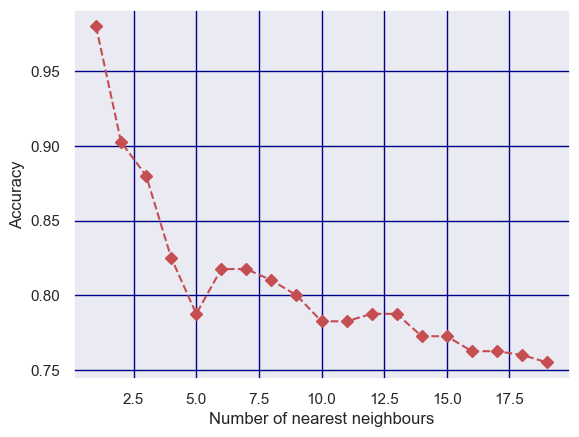

In [131]:
#plotting the accuracy values
sns.set()
plt.plot(k_values,k_acc,'--rD')
plt.xlabel('Number of nearest neighbours')
plt.ylabel('Accuracy')
plt.grid(color='#00008B')

The above graph shows how the accuracy is varying with different k values in KNN. It is seen that the accuracy is decreasing with increasing k values.

In [132]:
cvval = [5,7,10,12,15,17,20,23,25,30,40,50]
kvals = [2,3,4,5,6]
j = 0;
meanarr2 = []
meanarr3 = []
meanarr4 = []
meanarr5 = []
meanarr6 = []
#for k = 3
for i in cvval:
    cv_knn_k = KNeighborsClassifier(n_neighbors=kvals[j],p=2,metric='euclidean')
    cv_knn_scores_k = cross_val_score(cv_knn_k, X, Y, cv = i, scoring = 'accuracy')
    #print(cv_knn_scores_k)
    mean_cv_knn = np.mean(cv_knn_scores_k)
    meanarr2.append(mean_cv_knn)
j = j + 1
for i in cvval:
    cv_knn_k = KNeighborsClassifier(n_neighbors=kvals[j],p=2,metric='euclidean')
    cv_knn_scores_k = cross_val_score(cv_knn_k, X, Y, cv = i, scoring = 'accuracy')
    #print(cv_knn_scores_k)
    mean_cv_knn = np.mean(cv_knn_scores_k)
    meanarr3.append(mean_cv_knn)
    #print("\n")
j = j + 1
#for k = 4
for i in cvval:
    cv_knn_k = KNeighborsClassifier(n_neighbors=kvals[j],p=2,metric='euclidean')
    cv_knn_scores_k = cross_val_score(cv_knn_k, X, Y, cv = i, scoring = 'accuracy')
    #print(cv_knn_scores_k)
    mean_cv_knn = np.mean(cv_knn_scores_k)
    meanarr4.append(mean_cv_knn)
    #print("\n")
j = j + 1
#for k = 5
for i in cvval:
    cv_knn_k = KNeighborsClassifier(n_neighbors=kvals[j],p=2,metric='euclidean')
    cv_knn_scores_k = cross_val_score(cv_knn_k, X, Y, cv = i, scoring = 'accuracy')
    #print(cv_knn_scores_k)
    mean_cv_knn = np.mean(cv_knn_scores_k)
    meanarr5.append(mean_cv_knn)
    #print("\n")
j = j + 1
for i in cvval:
    cv_knn_k = KNeighborsClassifier(n_neighbors=kvals[j],p=2,metric='euclidean')
    cv_knn_scores_k = cross_val_score(cv_knn_k, X, Y, cv = i, scoring = 'accuracy')
    #print(cv_knn_scores_k)
    mean_cv_knn = np.mean(cv_knn_scores_k)
    meanarr6.append(mean_cv_knn)
print(meanarr2)
print("\n")
print(meanarr3)
print("\n")
print(meanarr4)
print("\n")
print(meanarr5)
print(meanarr6)
print("\n")

[0.9545000000000001, 0.9544981334455019, 0.9545000000000001, 0.9544615588100905, 0.9545430741031683, 0.9544486199521094, 0.9545000000000001, 0.9555106167846309, 0.9545, 0.9544173074023821, 0.9545, 0.9555]


[0.9155, 0.9140140561193192, 0.9139999999999999, 0.9129572180939324, 0.9120936670033293, 0.911947916932962, 0.9125, 0.9125262949920387, 0.9125, 0.911902608171265, 0.9125, 0.912]


[0.8345, 0.8219955483113379, 0.825, 0.8224815429382201, 0.8220476564545692, 0.8214885258753654, 0.8195, 0.8190032890531478, 0.82, 0.8199834162520729, 0.819, 0.8185000000000001]


[0.826, 0.8109960215223372, 0.8019999999999999, 0.7974713224154102, 0.7985149440766094, 0.7944499833831838, 0.7905, 0.7919761049707704, 0.7905, 0.7904341926729986, 0.7865, 0.7855]
[0.8240000000000001, 0.8225020593441646, 0.82, 0.8214655027294807, 0.8185089589645755, 0.8189448747773772, 0.8150000000000001, 0.8184977278802458, 0.815, 0.8139303482587066, 0.8140000000000001, 0.8150000000000003]




Text(0, 0.5, 'Accuracy')

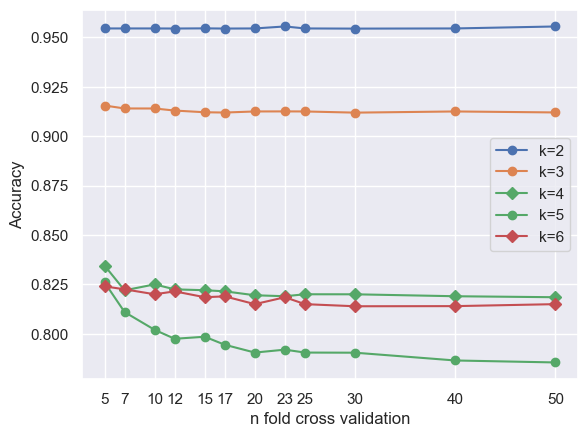

In [133]:
sns.set()
plt.plot(cvval, meanarr2,'-o',cvval, meanarr3,'-o',cvval, meanarr4,'-D',cvval, meanarr5,'go-',cvval, meanarr6,'-D')
plt.legend(["k=2","k=3", "k=4", "k=5","k=6"])
plt.xticks(cvval)
plt.xlabel("n fold cross validation")
plt.ylabel("Accuracy")

The above graph depicts the change in accuracy when the n value in n fold cross validation is changed for different values of k.
for k values equal to 2 to 6 are plotted and the variation is more for k = 5 for different n values.

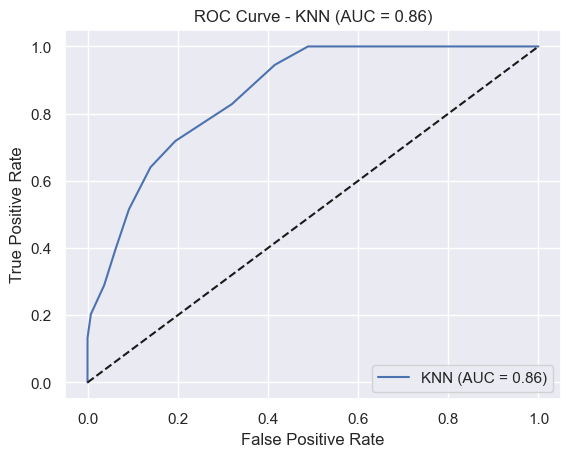

In [134]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtain the predicted probabilities for the positive class
y_scores = model_knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

# Calculate the area under the ROC curve (AUC-ROC)
auc = roc_auc_score(Y_test, y_scores)

# Plot the ROC curve
plt.plot(fpr, tpr, label='KNN (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN (AUC = {:.2f})'.format(auc))
plt.legend(loc='lower right')
plt.show()


The ROC curve for KNN is plotted and AUC - Area under the curve is 0.86 in this case. we have false positive rate and true positive rate on the x and y axis respectively. As the area under the graph increases, the ability of the model to distinguish between the two classes is high.It tells us how much the model is capable of distinguishing between classes.

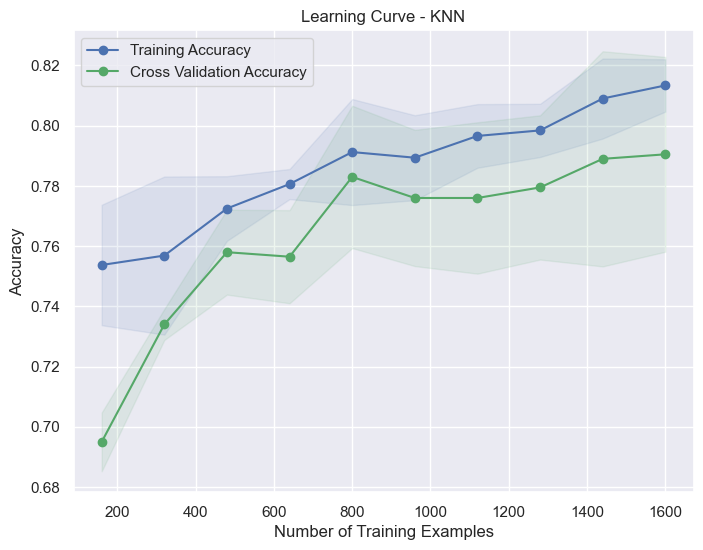

In [135]:
from sklearn.model_selection import learning_curve

# Define the number of training examples to use in the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute the learning curve scores
train_sizes, train_scores, val_scores = learning_curve(
    model_knn, X, Y, train_sizes=train_sizes, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - KNN')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='b')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Cross Validation Accuracy')
plt.legend(loc='best')
plt.show()


The above graph gives the number of training samples versus the accuracy for for the data. 
As the number of trainging samples increases, the accuracy(training accuracy and validation accuracy increases.
The validation accuracy should be equal or slightly less than the training accuracy to be a better model. here also, validation accuracy is less than training accuracy.

# SVM

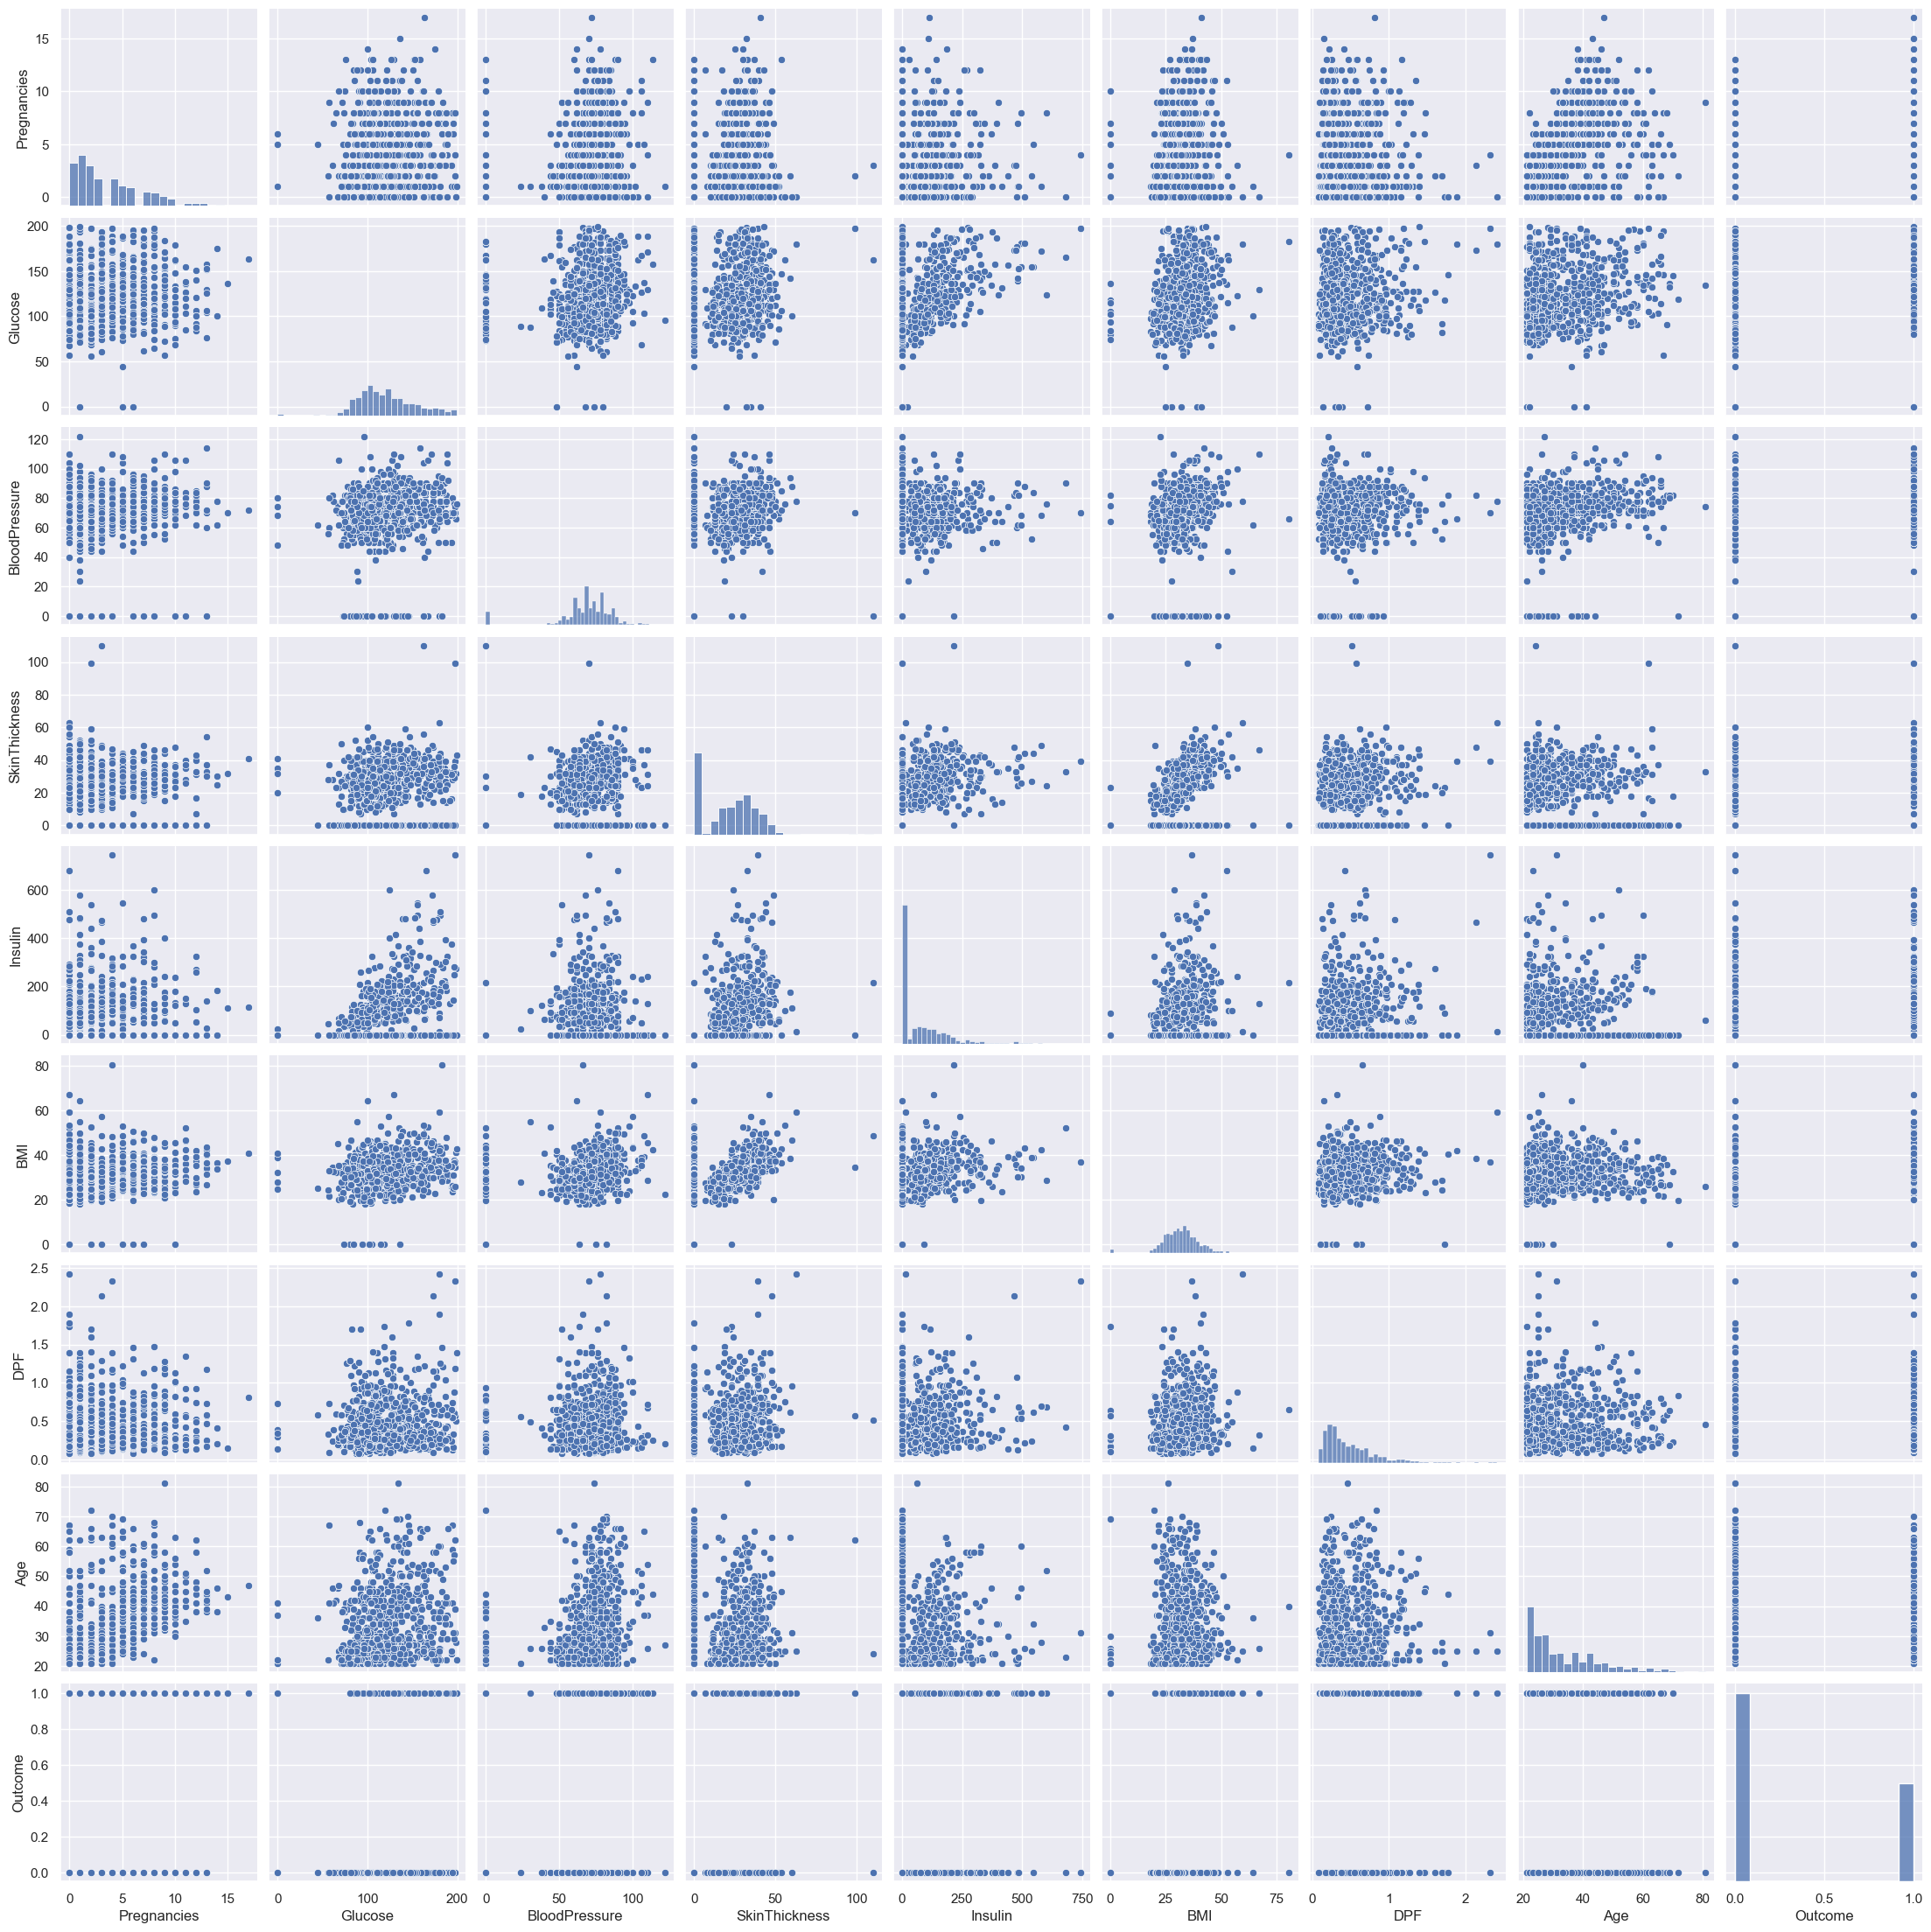

In [136]:
sns.pairplot(df)

In [137]:
from sklearn import svm 
model_svm_rbf = svm.SVC(kernel='rbf',probability=True) #Create an SVM classifier with the RBF (radial basis function) kernel 
model_svm_rbf.fit(X_train,Y_train)
model_svm_poly = svm.SVC(kernel='poly',probability=True) #Train the SVM classifier
model_svm_poly.fit(X_train,Y_train)

SVC(kernel='poly', probability=True)

In [138]:
Y_pred_svm_rbf = model_svm_rbf.predict(X_test)
Y_pred_svm_poly = model_svm_poly.predict(X_test)

In [139]:
from sklearn.metrics import confusion_matrix
ConfMatrix_svm_rbf = confusion_matrix(Y_test,Y_pred_svm_rbf) #Calculate the Confusion Matrix
print(ConfMatrix_svm_rbf)
ConfMatrix_svm_poly = confusion_matrix(Y_test,Y_pred_svm_poly)
print(ConfMatrix_svm_poly)

[[251  21]
 [ 53  75]]
[[260  12]
 [ 67  61]]


<Axes: >

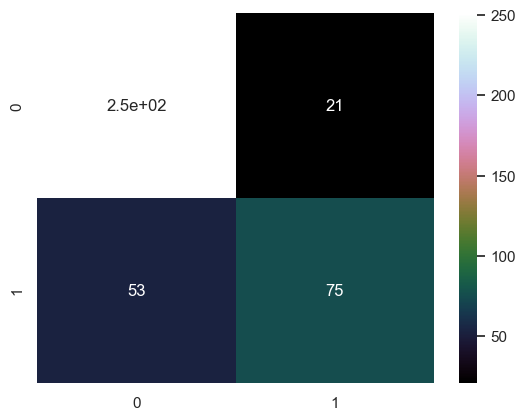

In [140]:
sns.heatmap(ConfMatrix_svm_rbf, cmap="cubehelix",annot = True) #Heatmap for Confusion Matrix

Above plot shows the heatmap of the confusion matrix using rbf kernel. 

<Axes: >

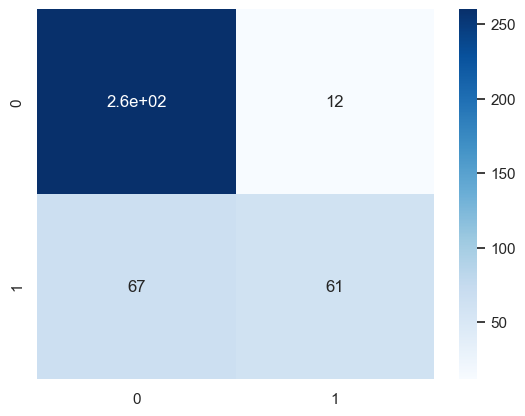

In [141]:
sns.heatmap(ConfMatrix_svm_poly, cmap="Blues",annot = True)

Above plot shows the heatmap of the confusion matrix using polynomial kernel.

In [142]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_svm_rbf))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       272
           1       0.78      0.59      0.67       128

    accuracy                           0.81       400
   macro avg       0.80      0.75      0.77       400
weighted avg       0.81      0.81      0.81       400



In [143]:
print(classification_report(Y_test, Y_pred_svm_poly))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       272
           1       0.84      0.48      0.61       128

    accuracy                           0.80       400
   macro avg       0.82      0.72      0.74       400
weighted avg       0.81      0.80      0.78       400



In [144]:
print(accuracy_score(Y_test,Y_pred_svm_rbf))

0.815


In [145]:
print(accuracy_score(Y_test,Y_pred_svm_poly))

0.8025


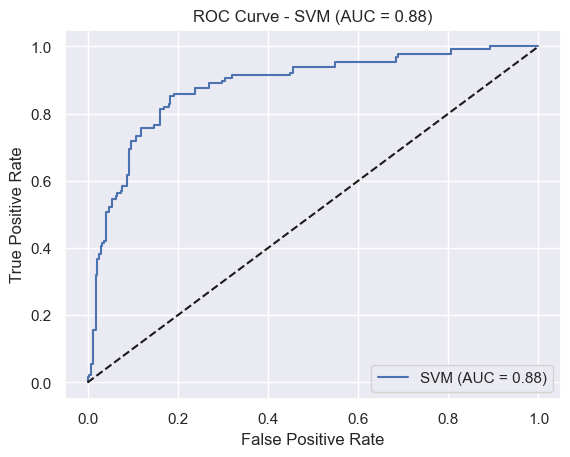

In [146]:
y_scores = model_svm_rbf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

# Calculate the area under the ROC curve (AUC-ROC)
auc = roc_auc_score(Y_test, y_scores)

# Plot the ROC curve
plt.plot(fpr, tpr, label='SVM (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (AUC = {:.2f})'.format(auc))
plt.legend(loc='lower right')
plt.show()


The ROC curve for SVM is plotted and AUC - Area under the curve is 0.88 in this case. we have false positive rate and true positive rate on the x and y axis respectively. As the area under the graph increases, the ability of the model to distinguish between the two classes is high.It tells us how much the model is capable of distinguishing between classes.
Here, the AUC is slightly more than the AUC for KNN which shows that SVM is better at distinguishing the two classes.

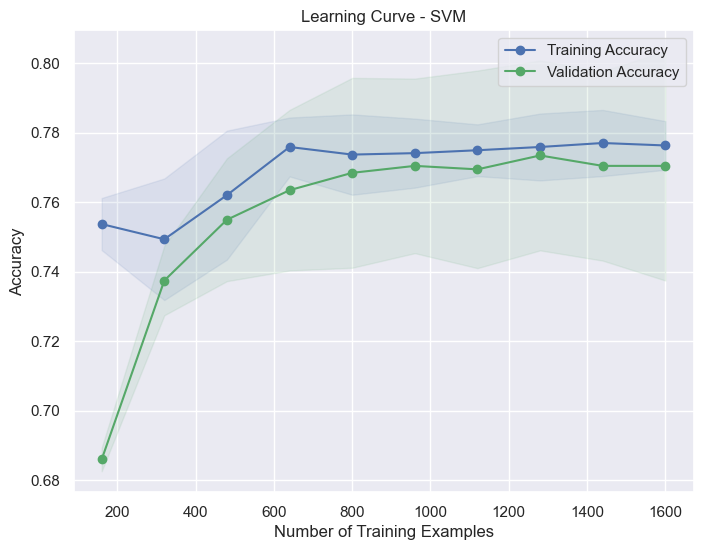

In [147]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute the learning curve scores
train_sizes, train_scores, val_scores = learning_curve(
    model_svm_rbf, X, Y, train_sizes=train_sizes, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - SVM')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='b')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation Accuracy')
plt.legend(loc='best')
plt.show()

In [148]:
#Here in the larning curve we can see

# K-Fold Cross Validation

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
cv_svm = svm.SVC(kernel='rbf', C=1, random_state=42)
cv_score = cross_val_score(cv_svm, X, Y, cv=10)
cv_score

array([0.74 , 0.75 , 0.795, 0.765, 0.79 , 0.805, 0.745, 0.7  , 0.825,
       0.77 ])

In [150]:
import numpy as np
avg = (100*np.mean(cv_score), 100*np.std(cv_score)/np.sqrt(cv_score.shape[0]))
print ("➔ Average score and uncertainty: (%.2f +- %.3f)%%"%avg)
mean_cv = np.mean(cv_score)
mean_cv

➔ Average score and uncertainty: (76.85 +- 1.100)%


0.7685000000000001

# Naive Bayes

In [151]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB() #Creates an instance of the Gaussian Naive Bayes classifier
model_nb.fit(X_train, Y_train) 

GaussianNB()

In [152]:
Y_pred_nb = model_nb.predict(X_test)
from sklearn.metrics import confusion_matrix
ConfMatrix_nb = confusion_matrix(Y_test,Y_pred_nb)
print(ConfMatrix_nb)

[[230  42]
 [ 55  73]]


<Axes: >

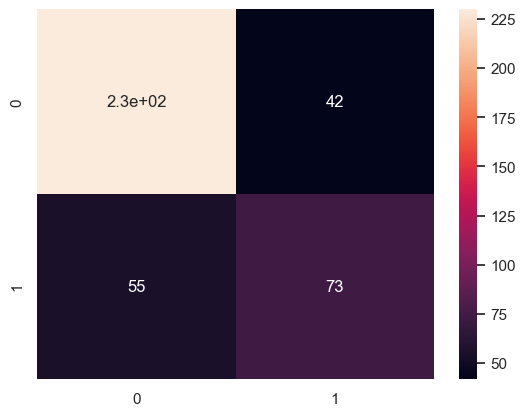

In [153]:
sns.heatmap(ConfMatrix_nb,annot = True)

In [154]:
print(classification_report(Y_test, Y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       272
           1       0.63      0.57      0.60       128

    accuracy                           0.76       400
   macro avg       0.72      0.71      0.71       400
weighted avg       0.75      0.76      0.75       400



In [155]:
print(accuracy_score(Y_test,Y_pred_nb))

0.7575


# Cross Validation

In [156]:
from sklearn.model_selection import cross_val_score
cv_nb = GaussianNB()
cv_score_nb = cross_val_score(cv_nb, X, Y, cv=10)
cv_score_nb

array([0.74 , 0.74 , 0.785, 0.75 , 0.765, 0.77 , 0.77 , 0.715, 0.765,
       0.755])

In [157]:
import numpy as np
avg_nb = (100*np.mean(cv_score_nb), 100*np.std(cv_score_nb)/np.sqrt(cv_score_nb.shape[0])) #Calculates the average score and uncertainty of the Naive Bayes classifier using cross-validation scores.
print ("➔ Average score and uncertainty: (%.2f +- %.3f)%%"%avg_nb)
mean_cv_nb = np.mean(cv_score_nb)
mean_cv_nb

➔ Average score and uncertainty: (75.55 +- 0.602)%


0.7555

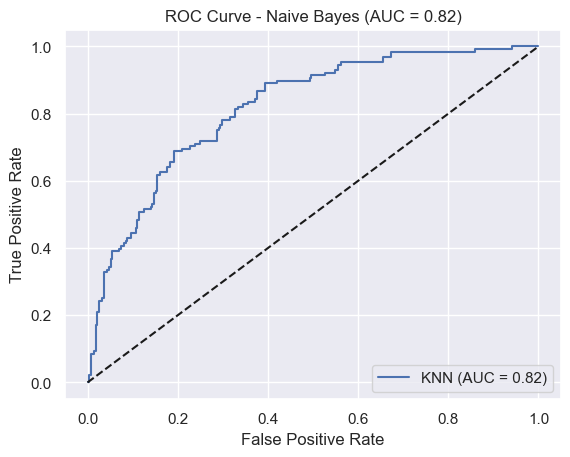

In [158]:
y_scores = model_nb.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

# Calculate the area under the ROC curve (AUC-ROC)
auc = roc_auc_score(Y_test, y_scores)

# Plot the ROC curve
plt.plot(fpr, tpr, label='KNN (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes (AUC = {:.2f})'.format(auc))
plt.legend(loc='lower right')
plt.show()

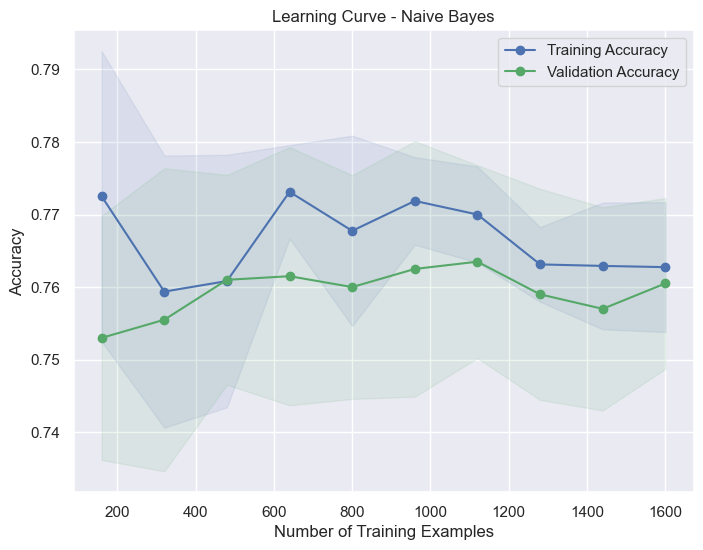

In [159]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute the learning curve scores
train_sizes, train_scores, val_scores = learning_curve(
    cv_nb, X, Y, train_sizes=train_sizes, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Naive Bayes')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1, color='b')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation Accuracy')
plt.legend(loc='best')
plt.show()

# Comparing ML Models

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7]} #defines the hyperparameter grid for the k-nearest neighbors classifier
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5) #creates a GridSearchCV object for the k-nearest neighbors classifier
knn_grid_search.fit(X_train, Y_train)  #fits the GridSearchCV object to the training data
best_knn = knn_grid_search.best_estimator_

svm = SVC()
svm_param_grid = {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5) 
svm_grid_search.fit(X_train, Y_train)
best_svm = svm_grid_search.best_estimator_

best_knn_score = best_knn.score(X_test, Y_test)
best_svm_score = best_svm.score(X_test, Y_test)

print('KNN Accuracy:', best_knn_score)
print('SVM Accuracy:', best_svm_score)

'''
The accuracy obtained from GridSearchCV represents the performance of the model with the optimized hyperparameters on the validation set. 
It is expected to be higher compared to the accuracy obtained from cross-validation because GridSearchCV selects the hyperparameters that perform best on the validation set.

On the other hand, the accuracy obtained through cross-validation represents an average performance of the model across multiple validation 
sets created during the cross-validation process. Cross-validation provides a more robust estimate of the model's
generalization performance by considering different subsets of the data.

'''


KNN Accuracy: 0.88
SVM Accuracy: 0.9075


"\nThe accuracy obtained from GridSearchCV represents the performance of the model with the optimized hyperparameters on the validation set. \nIt is expected to be higher compared to the accuracy obtained from cross-validation because GridSearchCV selects the hyperparameters that perform best on the validation set.\n\nOn the other hand, the accuracy obtained through cross-validation represents an average performance of the model across multiple validation \nsets created during the cross-validation process. Cross-validation provides a more robust estimate of the model's\ngeneralization performance by considering different subsets of the data.\n\n"

In [161]:
print("K Nearest neighbors: ",mean_cv_knn)
print("Support Vector Classifier: ",mean_cv)
print("Naive Bayes: ",mean_cv_nb)

K Nearest neighbors:  0.8150000000000003
Support Vector Classifier:  0.7685000000000001
Naive Bayes:  0.7555


In [162]:
perf_values = [accuracy_score(Y_test,Y_pred),accuracy_score(Y_test,Y_pred_svm_rbf),accuracy_score(Y_test,Y_pred_nb)]
perf_values
xbar = ['KNN', 'SVM', 'Naives Bayes']

Text(0, 0.5, 'Accuracy')

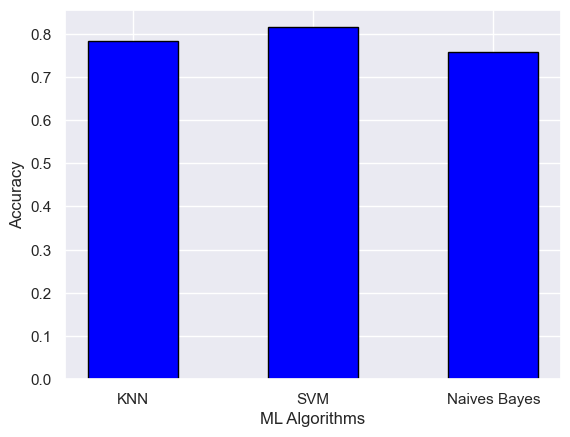

In [163]:
plt.bar(xbar,perf_values,color = 'blue',edgecolor = 'black',linewidth = 1, width = 0.5)
plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy")

# Making a Predictive system


In [164]:
from sklearn import svm
model = svm.SVC(kernel = 'rbf')
model.fit(X_train, Y_train)
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
train_data_accuracy

0.845

In [165]:
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_accuracy

0.815

In [166]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [167]:
df.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [168]:
#testing from the dataset; 1 rst patient
from sklearn.preprocessing import StandardScaler
data = (2,138,62,35,0,33.6,0.127,47)

#Converting to numpy array
data_array = np.asarray(data)

#Reshaping the array
data_reshape =  data_array.reshape(1,-1)

#Standardizing the data
data_standard = scaler.transform(data_reshape)

prediction = model.predict(data_standard)
print(prediction)

if(prediction == 0):
    print('Not-diabetic')
else:
    print('Diabetic')

[1]
Diabetic


C:\Users\91936\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [169]:
#testing from the dataset; 2000 th patient

data = (2,81,72,15,76,30.1,0.547,25)

#Converting to numpy array
data_array = np.asarray(data)

#Reshaping the array
data_reshape =  data_array.reshape(1,-1)

#Standardizing the data
data_standard = scaler.transform(data_reshape)

prediction = model.predict(data_standard)
print(prediction)

if(prediction == 0):
    print('Not-diabetic')
else:
    print('Diabetic')

[0]
Not-diabetic


C:\Users\91936\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [173]:
data = (8,183,64,0,0,34.3,0.672,32)

#Converting to numpy array
data_array = np.asarray(data)

#Reshaping the array
data_reshape =  data_array.reshape(1,-1)

#Standardizing the data
data_standard = scaler.transform(data_reshape)

prediction = model.predict(data_standard)
print(prediction)

if(prediction == 0):
    print('Not-diabetic')
else:
    print('Diabetic')

[1]
Diabetic


C:\Users\91936\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [175]:
#The prominent features are Glucose, BMI, Pregnancies, DPF and age. We can see in this example that the values for glucose,
#BMI and Pregnacies are away from the normal value, which is why we conclude that the patient is diabetic